In [2]:
# Importamos todas las librerías que necesitamos

import pandas as pd             # Importamos Pandas para trabajar con datos
import numpy as np              # Importamos Numpy para trabajar con operaciones matemáticas
import matplotlib.pyplot as plt #Importamos Matplotlib para visualizar los datos en gráficos

In [3]:
# Vemos que hay en la carpeta donde estoy corriendo el código
!ls

01 - Limpieza de datos y exploración IMDB.ipynb
02 - Limpieza de datos y exploración - DNI.ipynb
03 - MELI y Trama.ipynb
Aprendé con MELI y Trama (respuestas).xlsx
Aprendé con MELI y Trama (respuestas)_completa.xlsx
Aprendé con MELI y Trama_cruda.xlsx
dataset_tp1p1
dataset_tp1p2
dataset_tp1p3
imdb-banner-1.jpeg
peliano.csv
regresión lineal para calcular edades.xlsx
test.xlsx


In [4]:
# Cargamos el archivo Excel en un Dataframe de Pandas

df=pd.read_excel("Aprendé con MELI y Trama (respuestas).xlsx",sheet_name='Respuestas de formulario 1')

In [5]:
df.columns

Index(['Marca temporal', 'Dirección de correo electrónico',
       'Nombre y Apellido', 'Número de celular (Ejemplo 11 XXXX XXXX)',
       'Universidad', 'Carrera', 'Año de Cursada',
       'Qué esperás aprender en el curso?', 'Adjuntá tu CV (opcional)'],
      dtype='object')

In [7]:
df.drop(columns=['Dirección de correo electrónico',
       'Nombre y Apellido', 'Número de celular (Ejemplo 11 XXXX XXXX)'],inplace=True)

In [8]:
# Veamos que hay en el dataframe
df.head()

,Marca temporal,Universidad,Carrera,Año de Cursada,Qué esperás aprender en el curso?,Adjuntá tu CV (opcional)
0,2020-11-19 17:11:32.977,ITBA,Administración y Sistemas,3,Quiero saber como percha hace Meli para tener ...,NaN
1,2020-11-20 20:05:11.037,UNEXPO,Ingeniería Industrial,Recibido,Ideas para tomar decisiones.data driven,NaN
2,2020-11-20 20:09:36.372,UBA,Economía,4,Espero aprender como poder sacarle el mayor re...,https://drive.google.com/open?id=1AvNlik14C6jE...
3,2020-11-20 20:19:52.698,ITBA,Ingeniería Industrial,2,Interesarme más en data science,NaN
4,2020-11-20 20:22:28.941,UBA,Economía,3,Análisis de datos,NaN


In [9]:
# Veamos cuantos inscriptos tenemos anotados

len(df)

185

In [10]:
# Veamos las columnas que tenemos

df.columns

Index(['Marca temporal', 'Universidad', 'Carrera', 'Año de Cursada',
       'Qué esperás aprender en el curso?', 'Adjuntá tu CV (opcional)'],
      dtype='object')

In [11]:
# Veamos los tipos de dato de cada Columna
df.dtypes

Marca temporal                       datetime64[ns]
Universidad                                  object
Carrera                                      object
Año de Cursada                               object
Qué esperás aprender en el curso?            object
Adjuntá tu CV (opcional)                     object
dtype: object

https://www.datacamp.com/community/tutorials/wordcloud-python

In [12]:
# Veamos cuantos datos nulos hay
df.isna().sum()

Marca temporal                         0
Universidad                            1
Carrera                                1
Año de Cursada                         1
Qué esperás aprender en el curso?      0
Adjuntá tu CV (opcional)             105
dtype: int64

In [13]:
# ¿Cuántos datos únicos hay en "Año de Cursada"
df['Año de Cursada'].unique()

array([3, 'Recibido', 4, 2, 5, 1, '?', 'Recibido ', nan, 6, 'Secundaria',
       'Ninguna ', '.', 'Ingreso'], dtype=object)

In [14]:
# Veamos cual es el dato nulo
df[df['Año de Cursada'].isna()]

,Marca temporal,Universidad,Carrera,Año de Cursada,Qué esperás aprender en el curso?,Adjuntá tu CV (opcional)
51,2020-11-21 15:12:12.232,NaN,NaN,NaN,Espero encontrar herramientas y formas de trab...,NaN


In [15]:
# Reemplazamos los nulos de "Año de Cursada" por ND: No Data
df['Año de Cursada'].fillna('ND', inplace=True)

In [16]:
# ¿Cuántos datos únicos hay en "Año de Cursada"
df['Año de Cursada'].unique()

array([3, 'Recibido', 4, 2, 5, 1, '?', 'Recibido ', 'ND', 6, 'Secundaria',
       'Ninguna ', '.', 'Ingreso'], dtype=object)

In [17]:
# Veamos cual es el dato nulo
df[df['Año de Cursada']=='?']

,Marca temporal,Universidad,Carrera,Año de Cursada,Qué esperás aprender en el curso?,Adjuntá tu CV (opcional)
13,2020-11-20 20:43:21.696,UNLAM,Lic RRHH,?,Herramientas,NaN


In [22]:
# Veamos cuantas personas en cada status hay
df.groupby(['Año de Cursada'])['Marca temporal'].agg('count')

Año de Cursada
1             13
2             10
3             24
4             31
5             45
6              1
.              1
?              1
Ingreso        1
ND             1
Ninguna        1
Recibido      54
Recibido       1
Secundaria     1
Name: Marca temporal, dtype: int64

In [24]:
# Creo una nueva columna para agrupar los datos sin perder los datos originales
df['year_career']=df['Año de Cursada']
df.head()

,Marca temporal,Universidad,Carrera,Año de Cursada,Qué esperás aprender en el curso?,Adjuntá tu CV (opcional),year_career
0,2020-11-19 17:11:32.977,ITBA,Administración y Sistemas,3,Quiero saber como percha hace Meli para tener ...,NaN,3
1,2020-11-20 20:05:11.037,UNEXPO,Ingeniería Industrial,Recibido,Ideas para tomar decisiones.data driven,NaN,Recibido
2,2020-11-20 20:09:36.372,UBA,Economía,4,Espero aprender como poder sacarle el mayor re...,https://drive.google.com/open?id=1AvNlik14C6jE...,4
3,2020-11-20 20:19:52.698,ITBA,Ingeniería Industrial,2,Interesarme más en data science,NaN,2
4,2020-11-20 20:22:28.941,UBA,Economía,3,Análisis de datos,NaN,3


In [25]:
type(df.year_career[0])

int

In [26]:
df.year_career=df.year_career.astype(str)
type(df.year_career[0])

str

In [27]:
# Creo un diccionario para trabajar agrupar los años
diccio={'1':'1',
        '2':'2',
        '3':'3',
        '4':'4',
        '5':'5',
        '6':'6',
        '2012-2018':'Finalizada',
        '2013-2019':'Finalizada',
        '?':'Finalizada',
        'Finalizada':'Finalizada',
        'ND':'ND',
        'Recibido':'Finalizada',
        'Recibido ':'Finalizada',
        'Recién graduado':'Finalizada',
        'Último año de secundaria':'Secundaria',
        '.':'Finalizada',
        'Ninguna ':'ND',
        'Ingreso':'1'
       }

In [28]:
df.replace({"year_career": diccio},inplace=True)

In [29]:
df.year_career.unique()

array(['3', 'Finalizada', '4', '2', '5', '1', 'ND', '6', 'Secundaria'],
      dtype=object)

year_career
1             14
2             10
3             24
4             31
5             45
6              1
Finalizada    57
ND             2
Secundaria     1
Name: Marca temporal, dtype: int64


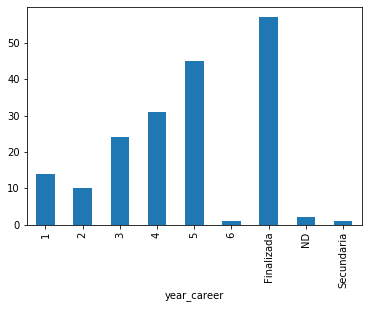

In [30]:
# Veamos cuantas personas en cada status hay
df.groupby(['year_career'])['Marca temporal'].agg('count').plot(kind='bar')
print(df.groupby(['year_career'])['Marca temporal'].agg('count'))

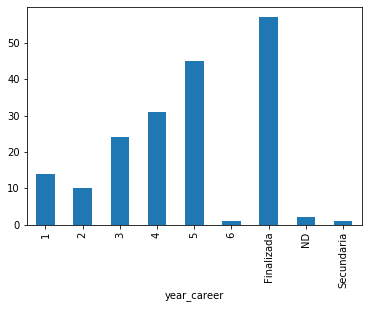

In [31]:
df.groupby(['year_career'])['Marca temporal'].agg('count').plot(kind='bar')

https://stackoverflow.com/questions/22635110/sorting-the-order-of-bars-in-pandas-matplotlib-bar-plots

In [30]:
df.head()

,Marca temporal,Dirección de correo electrónico,Nombre y Apellido,Número de celular (Ejemplo 11 XXXX XXXX),Universidad,Carrera,Año de Cursada,Qué esperás aprender en el curso?,Adjuntá tu CV (opcional),year_career
0,2020-11-19 17:11:32.977,jreig@itba.edu.ar,Juan Ignacio Reig,1156915362,ITBA,Administración y Sistemas,3,Quiero saber como percha hace Meli para tener ...,NaN,3
1,2020-11-20 20:05:11.037,juan@eklos.com.ar,Juan Betancourt,1158808607,UNEXPO,Ingeniería Industrial,Recibido,Ideas para tomar decisiones.data driven,NaN,Finalizada
2,2020-11-20 20:09:36.372,clemente2pirovani@gmail.com,Clemente Pirovani,3442459052,UBA,Economía,4,Espero aprender como poder sacarle el mayor re...,https://drive.google.com/open?id=1AvNlik14C6jE...,4
3,2020-11-20 20:19:52.698,jcarzalo@itba.edu.ar,Jerónimo Carzalo,2944304360,ITBA,Ingeniería Industrial,2,Interesarme más en data science,NaN,2
4,2020-11-20 20:22:28.941,nachocasnq@gmail.com,Ignacio Casna,1135569158,UBA,Economía,3,Análisis de datos,NaN,3


In [32]:
# Veamos cuantas personas por universidad tenemos

df.groupby(['Universidad'])['Marca temporal'].agg('count').sort_values(ascending=False)

Universidad
ITBA                               63
Universidad Nacional de Tucumán    17
UBA                                11
UTN                                 9
ITBA                                4
                                   ..
UTN FRH                             1
UTN FRC                             1
UTDT                                1
itba                                1
.                                   1
Name: Marca temporal, Length: 64, dtype: int64

In [45]:
df['Universidad'].unique()

array(['ITBA', 'UNEXPO', 'UBA', 'Universidad Nacional de Tucumán', 'UADE',
       'UNLAM', 'UCEMA', 'Nacional del Sur', 'UNC', 'UCSE ', 'UTN',
       'Universidad Nacional de Cuyo', 'Uncuyo', 'Unc',
       'Universidad Nacional Del sur', 'Siglo XXI', 'Unt',
       'Universidad de la Patagonia San Juan Bosco',
       'Universidad Nacional de Villa Mercedes',
       'Universidad Nacional de Cordoba', 'UCC',
       'Universidad Nacional de Córdoba ', nan, 'UNPSJB', 'UNT',
       'Universidad Nacional del Sur',
       'Facultad de ciencias exactas y tecnología UNT', 'UNLP', 'UNSAM',
       'UNNE', 'Universidad Nacional de Tucuman', 'Instituto Politécnico',
       'Universidad Nacional de Tucumán ', 'Siglo 21', 'ORT',
       'Universidad Nacional de Río Cuarto',
       'universidad nacional de santiago del estero',
       'Universidad Nacional de La Plata', 'FaMAF UNC', 'ITBA ',
       'Universidad de San Andrés', 'Universidad Nacional de Córdoba',
       'Uca', 'FACULTAD DE CIENCIAS EXACTA

In [34]:
dic_univer={'Universidad Nacional de Tucumán':'UNT',
            'Universidad Nacional de Cuyo':'UNCUYO',
            'Nacional del Sur':'UNS',
            'Uncuyo':'UNCUYO',
            'Unc':'UNC',
            'Universidad Nacional Del sur':'UNS',
            'Universidad de la Patagonia San Juan Bosco':'UNPSJB',
            'Universidad Nacional de Villa Mercedes':'UNVIME',
            'Universidad Nacional de Cordoba':'UNC',
            'Universidad Nacional de Córdoba':'UNC',
            'Universidad Nacional del Sur':'UNS',
            'Facultad de ciencias exactas y tecnología UNT':'UNT',
            'Universidad Nacional de Tucuman':'UNT',
            'Universidad Nacional de Río Cuarto':'UNRC',
            'universidad nacional de santiago del estero':'UNSE',
            'Siglo 21':'Siglo XXI',
            'Universidad Nacional de Tucumán ':'UNT',
            'Universidad Nacional de La Plata':'UNLP',
            'ORT Argentina':'ORT',
            'ITBA ':'ITBA',
            'Universidad del Norte Santo Tomás de Aquino (UNSTA)':'UNSTA',
            'Universidad nacional de quilmes':'UNQ',
            'Universidad Austral':'UA',
            'Universidad Nacional de Córdoba ':'UNC',
            'FACULTAD DE CIENCIAS EXACTAS Y TECNOLOGIA':'UNT',
            'Universidad Católica de Cordoba':'UCC',
            'FACULTAD DE CIENCIAS EXACTAS Y TECNOLOGIA ':'UNT',
            'Universidad de San Andrés':'UDESA',
            '.':'ND',
            'UTN FRC':'UTN FRC',
            'UTN FRH':'UTN FRH',
            'FIUBA':'UBA',
            'Universidad Nacional de Salta':'UNSA',
            'Universidad de Carabobo':'UC',
            'Ninguna ':'ND',
            'FaMAF UNC':'UNC',
            'UTN FRSF':'UTN FRSF',
            'Unt':'UNT',
            'Simon Bolivar':'USB',
            'Uca':'UCA',
            'Instituto Politécnico':'ND',
            'FADU':'UBA',
            'itba':'ITBA'
           }

In [35]:
df['university']=df['Universidad']
df.replace({"university": dic_univer},inplace=True)

In [36]:
# Veamos cuantas personas por universidad tenemos

df.groupby(['university'])['Marca temporal'].agg('count').sort_values(ascending=False)

university
ITBA         68
UNT          25
UBA          13
UTN           9
UNC           8
UNLP          5
Siglo XXI     4
UNCUYO        4
UADE          4
UCEMA         4
UNPSJB        4
ND            3
UNS           3
UCC           2
UCES          2
UCA           2
UNVIME        2
ORT           2
UDESA         1
UB            1
UCSE          1
UA            1
UC            1
UTN FRSF      1
UNEXPO        1
UTN FRH       1
UNNE          1
UNQ           1
UNR           1
UNRC          1
UNSA          1
UNSAM         1
UNSE          1
UNSTA         1
USB           1
UTDT          1
UTN FRC       1
UNLAM         1
Name: Marca temporal, dtype: int64

In [37]:
df['Qué esperás aprender en el curso?'].tolist()

['Quiero saber como percha hace Meli para tener tan buena atencion al cliente cuando en todos los otros lugares es una cagada.',
 'Ideas para tomar decisiones.data driven ',
 'Espero aprender como poder sacarle el mayor rendimiento a los datos que obtenemos sobre nuestros clientes para tomar decisiones que hagan procesos mas eficientes y que potencien la rentabilidad del emprendimiento. ',
 'Interesarme más en data science',
 'Análisis de datos ',
 'Me gustaría aprender una metodología para poder encarar el análisis de Big data aplicado a datos generados por clientes ',
 'Conceptos sobre Big data ',
 'Me encantaría aprender la base de algunas herramientas de ciencias de datos para la toma de decisiones. Mi objetivo es  entender de que se habla cuando me comunico con equipos del area  Informatica y para luego utilizarlas yo mismo.',
 'Entender en profundidad la forma en que se usan los datos para tomar decisiones estratégicas en las empresas.',
 'Tipos de análisis como el descripto para

In [38]:
text=' '.join(df['Qué esperás aprender en el curso?'].tolist())

In [39]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

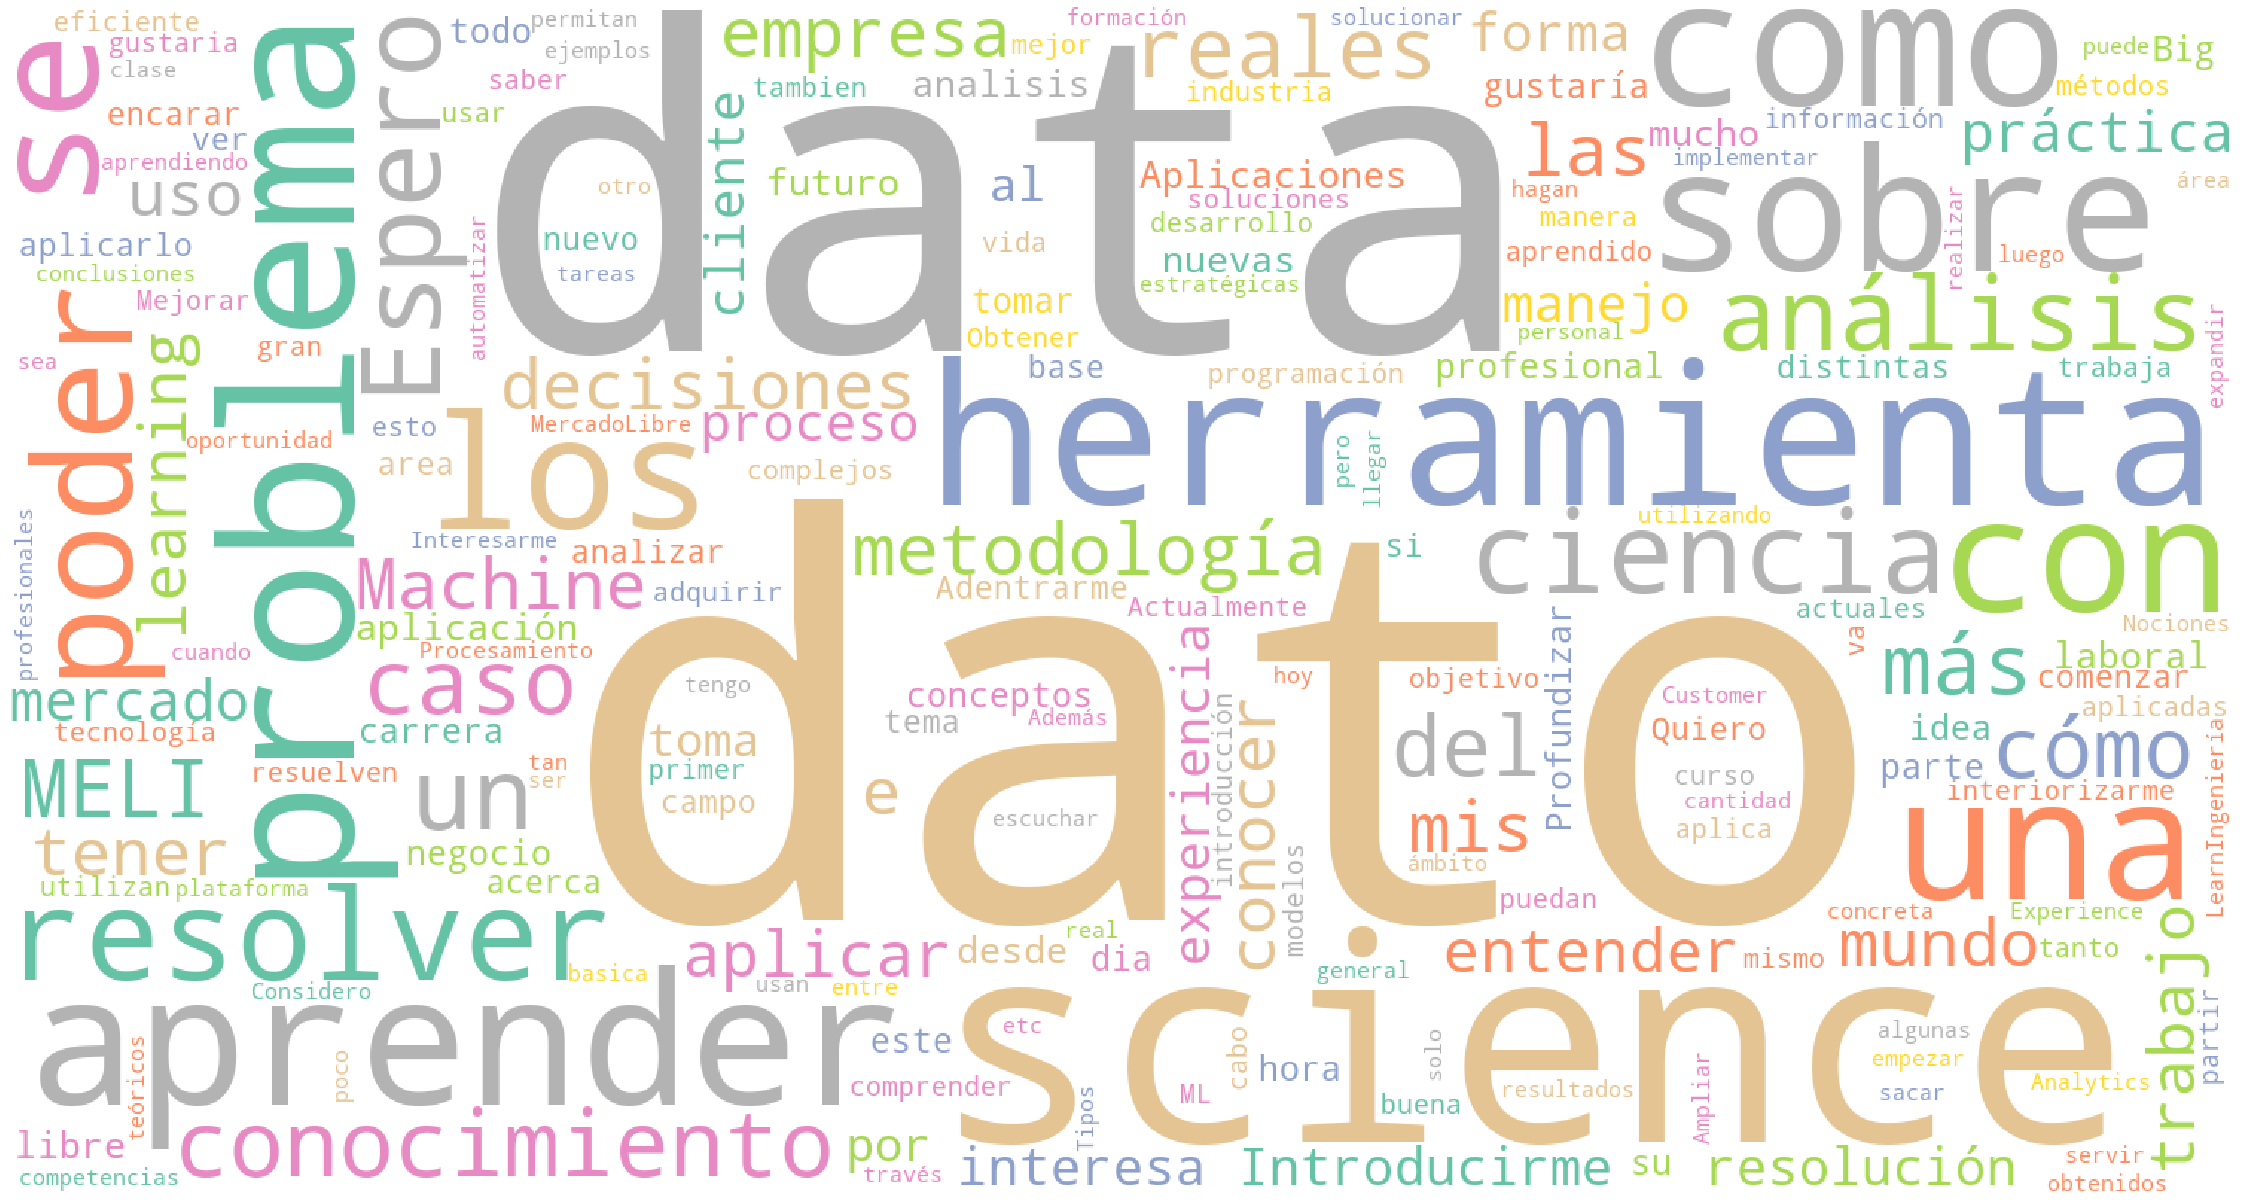

In [40]:
# Import package
from wordcloud import WordCloud, STOPWORDS

STOPWORDS.update(['y', 'de','la','para','que','mi','lo','en','el','mas','Estoy'])

# Generate word cloud
wordcloud = WordCloud(width = 1500, height = 800, random_state=1,
                      background_color='white', colormap='Set2', collocations=False,
                      stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [41]:
# En que provincias están

dic_provincias={'ITBA':'Ciudad de Buenos Aires',
                'UNEXPO':'Bolívar',
                'UBA':'Ciudad de Buenos Aires',
                'UNT':'Tucumán',
                'UADE':'Ciudad de Buenos Aires',
                'UNLAM':'Provincia de Buenos Aires',
                'UCEMA':'Ciudad de Buenos Aires',
                'UNS':'Provincia de Buenos Aires',
                'UNC':'Córdoba',
                'UCSE ': 'Santiago del Estero',
                'UTN':'Ciudad de Buenos Aires',
                'UNCUYO':'Mendoza',
                'Siglo XXI':'Ciudad de Buenos Aires',
                'UNPSJB':'Chubut',
                'UNVIME':'San Luis',
                'UCC':'Córdoba',
                'UNLP':'Provincia de Buenos Aires',
                'UNSAM':'Provincia de Buenos Aires',
                'UNNE':'Corrientes',
                'IP':'ND',
                'ORT':'Ciudad de Buenos Aires', 'UNRC':'Córdoba', 'UNSE':'Santiago del Estero',
                'UDESA':'Provincia de Buenos Aires', 'UCA':'Ciudad de Buenos Aires', 'USB':'Caracas', 'UNSA':'Salta',
                'UCES':'Ciudad de Buenos Aires', 'UNR':'Santa Fe', 'UTN FRSF':'Santa Fe',
                'UNQ':'Provincia de Buenos Aires', 'UTDT':'Ciudad de Buenos Aires', 'UC':'Mendoza',
                'ND':'ND', 'UB':'Ciudad de Buenos Aires', 'UTN FRH':'Provincia de Buenos Aires', 'UTN FRC':'Córdona',
                'UA':'Provincia de Buenos Aires','UNSTA':'Tucumán'}

In [42]:
df['provincias']=df['university']
df.replace({"provincias": dic_provincias},inplace=True)

In [44]:
df.groupby(['provincias'])['Marca temporal'].agg('count').sort_values(ascending=False).to_excel('provincias.xlsx')

In [46]:
df.groupby(['Carrera'])['Marca temporal'].agg('count').sort_values(ascending=False)

Carrera
Ingeniería Industrial         49
Ingeniería Mecánica            8
Administración de Empresas     8
Administración y Sistemas      8
Economía                       5
                              ..
Ingeniería Biomedica           1
Ingeniería Biomédica           1
Ingeniería Biomédica           1
Ingeniería Civil               1
.                              1
Name: Marca temporal, Length: 88, dtype: int64

In [47]:
df['Carrera'].unique()

array(['Administración y Sistemas', 'Ingeniería Industrial', 'Economía',
       'Economía ', 'Analítica empresarial y social ',
       'Ingeniería Electrónica',
       'Ingeniería Electronica y Negocios Industriales internacionales',
       'Administración de Empresas', 'Lic RRHH', 'Actuario',
       'Ingeniería en informática ', 'Ingenería Industrial',
       'Licenciatura en Sistemas', 'Ingeniería Industrial ',
       'Ing en computación ', 'Ingeniería en Sistemas',
       'Contador Público Nacional y Perito Partidor ', 'Contador Publico',
       'Ingenieria Mecanica, Diplomatura Data Science', 'Abogacia',
       'Ing. en Sistemas de Informacion',
       'Ingenieria en Sistemas de Informacion',
       'Licenciatura en ciencias de la Computacion',
       'Lic. En Relaciones Internacionales',
       'Administración de Empresas ', nan, 'Ingenieria Quimica',
       'Ingeniería Biomedica', 'Lic. en Matemática',
       'Ingeniería en sistemas de información ', 'Ingeniería Mecánica',
      

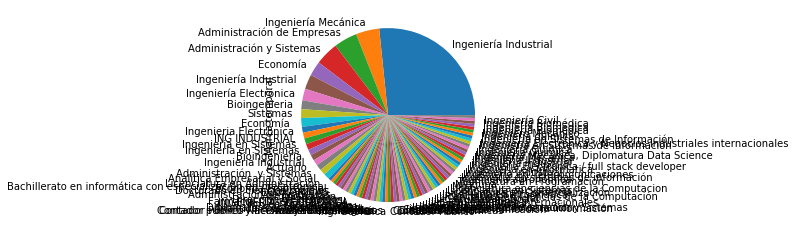

In [49]:
df.groupby(['Carrera'])['Marca temporal'].agg('count').sort_values(ascending=False).plot(kind='pie')

In [53]:
dic_carreras={
        'Administración y Sistemas':'Administración',
        'Ingeniería Industrial':'Ingeniería',
        'Economía':'Economía',
        'Economía ':'Economía',
        'Analítica empresarial y social ':'Otros',
        'Ingeniería Electrónica':'Ingeniería',
        'Ingeniería Electronica y Negocios Industriales internacionales':'Ingeniería',
        'Administración de Empresas':'Administración', 
        'Lic RRHH':'Otros', 'Actuario':'Otros',
        'Ingeniería en informática ':'Ingeniería', 
        'Ingenería Industrial':'Ingeniería',
        'Licenciatura en Sistemas':'Sistema', 
        'Ingeniería Industrial ':'Ingeniería',
        'Ing en computación ':'Ingeniería',
        'Ingeniería en Sistemas':'Ingeniería',
        'Contador Público Nacional y Perito Partidor ':'Otros', 
        'Contador Publico':'Otros',
        'Ingenieria Mecanica, Diplomatura Data Science':'Ingeniería', 
        'Abogacia':'Otros',
        'Ing. en Sistemas de Informacion':'Ingeniería',
        'Ingenieria en Sistemas de Informacion':'Ingeniería',
        'Licenciatura en ciencias de la Computacion':'Sistemas',
        'Lic. En Relaciones Internacionales':'Otros',
        'Administración de Empresas ':'Administración', 
        'Ingenieria Quimica':'Ingeniería',
        'Ingeniería Biomedica':'Ingeniería', 
        'Lic. en Matemática':'Matemática',
        'Ingeniería en sistemas de información ':'Ingeniería', 
        'Ingeniería Mecánica':'Ingeniería',
        'Sistemas':'Sistemas',
        'Ingenieria en Sistemas':'Ingeniería',
        'Diplomatura en desarrollo web':'Sistemas', 
        'Lic. en Marketing':'Otros',
        'Bachillerato en informática con especialización en mecatrónica':'Ingeniería',
        'Ingeniería en Telecomunicaciones':'Ingeniería', 
        'ingenieria agronomica':'Ingeniería',
        'Lic.en Trabajo Social':'Otros', 
        'Ingenieria Química':'Ingeniería',
        'Licenciatura en Ciencias de la Computación':'Sistemas', 
        'Administración':'Administración',
        'Det ':'Otros', 
        'Contador público y licenciatura en finanzas':'Otros',
        'Lic en biotecnología':'Otros', 
        'Ingeniería Biomédica':'Ingeniería',
        'Ingenieria Electronica':'Ingeniería', 
        'Ing. Geofisica':'Ingeniería',
        'Licenciatura en Comercialización ':'Otros', 
        'Ciencias de la Comunicación':'Otros',
        'Mba':'Otros', 
        'Ingenieria Industrial ':'Ingeniería', 
        'Diseño Gráfico':'Otros',
        'Ing. En petroleo':'Ingeniería', 
        'Analitica de Negocios':'Otros',
        'Licenciatura en Administración':'Administración', 
        'Farmacia - Diseñador UX UI':'Otros',
        'Analítica Empresarial y Social':'Otros', 
        'Ingeniería Biomédica ':'Ingeniería',
        'ingeniería en sistemas de la información ':'Ingeniería', 
        'Ingenieria Mecanica':'Ingeniería',
        'Doctorado en ciencias sociales':'Otros', 
        'Economía Empresarial':'Economía',
        'Ingeniería Civil':'Ingeniería', 
        'Tecnicatura en Programacion':'Sistemas', 
        'Bioingeniería':'Ingeniería',
        'Analista de Sistemas ':'Sistemas', 
        'Bioingenieria':'Ingeniería',
        'Ninguna ':'Otros',
        'Ingenieria quimica':'Ingeniería', 
        'Ingenieria en Sistemas de Información ':'Ingeniería',
        'Ingenieria en Informatica':'Ingeniería', 
        'Comercialización':'Otros',
        'Administración  y Sistemas':'Administración', 
        'Ingeniero Mecanico':'Ingeniería',
        'Dirección de negocios':'Otros', 
        'ECONÓMICAS ':'Economía', 
        'Electrónica ':'Ingeniería', 
        '.':'Otros',
        'Ciencias economicas':'Economía', 
        'Data Mining':'Otros', 
        'Contador':'Otros',
        'INGENIERIA ELECTRONICA':'Ingeniería',
        'Licenciatura en Administración y Sistemas':'Administración',
        'Ingenieria Electrónica / full stack developer ':'Ingeniería',
        'Ingeniería industrial':'Ingeniería', 
        'ING INDUSTRIAL':'Ingeniería', 
        'Ingenieria Industrial':'Ingeniería',
        'ingenieria industrial':'Ingeniería'
}

In [54]:
df['careers']=df['Carrera']
df.replace({"careers": dic_carreras},inplace=True)

In [55]:
df.head()

,Marca temporal,Universidad,Carrera,Año de Cursada,Qué esperás aprender en el curso?,Adjuntá tu CV (opcional),year_career,university,provincias,careers
0,2020-11-19 17:11:32.977,ITBA,Administración y Sistemas,3,Quiero saber como percha hace Meli para tener ...,NaN,3,ITBA,Ciudad de Buenos Aires,Administración
1,2020-11-20 20:05:11.037,UNEXPO,Ingeniería Industrial,Recibido,Ideas para tomar decisiones.data driven,NaN,Finalizada,UNEXPO,Bolívar,Ingeniería
2,2020-11-20 20:09:36.372,UBA,Economía,4,Espero aprender como poder sacarle el mayor re...,https://drive.google.com/open?id=1AvNlik14C6jE...,4,UBA,Ciudad de Buenos Aires,Economía
3,2020-11-20 20:19:52.698,ITBA,Ingeniería Industrial,2,Interesarme más en data science,NaN,2,ITBA,Ciudad de Buenos Aires,Ingeniería
4,2020-11-20 20:22:28.941,UBA,Economía,3,Análisis de datos,NaN,3,UBA,Ciudad de Buenos Aires,Economía


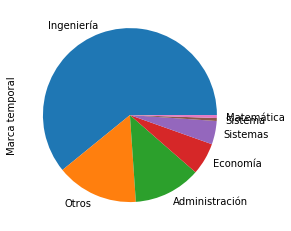

In [56]:
df.groupby(['careers'])['Marca temporal'].agg('count').sort_values(ascending=False).plot(kind='pie')

In [58]:
df.groupby(['careers'])['Marca temporal'].agg('count').sort_values(ascending=False)

careers
Ingeniería        112
Otros              28
Administración     23
Economía           11
Sistemas            8
Sistema             1
Matemática          1
Name: Marca temporal, dtype: int64